<a href="https://colab.research.google.com/github/koh-hongQ/python/blob/main/%EB%85%BC%ED%94%84_%EA%B3%BC%EC%A0%9C_%EC%8B%AC%EC%9E%A5%EB%B3%91%EB%B0%9C%EB%B3%91%EC%98%88%EC%B8%A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/koh-hongQ/python.git
#  데이터를 불러옵니다.
df = pd.read_csv("./python/heart disease classification dataset.csv")

# 데이터를 미리 살펴보겠습니다. 
df

fatal: destination path 'python' already exists and is not an empty directory.


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [9]:
# 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다. 
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
cp              int64
trestbps      float64
chol          float64
fbs             int64
restecg         int64
thalach       float64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target         object
dtype: object

In [10]:
#1 속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(20)

thalach       5
trestbps      4
chol          1
Unnamed: 0    0
age           0
sex           0
cp            0
fbs           0
restecg       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [24]:
#1 결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다. 
df = df.fillna(df.mean())

#1 업데이트된 데이터 프레임을 출력해봅니다.
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3,no


In [26]:
#2 관련 속성을 X로 저장해 표준화 시키고, sex와 target를 y로 저장해 원핫인코딩합니다.


df= pd.get_dummies(df)

normalization_df = (df - df.mean())/df.std()
X = normalization_df
df

,Unnamed: 0,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_female,sex_male,target_no,target_yes
0,0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,0,1,0,1
1,1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,0,1,0,1
2,2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1,0,0,1
3,3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,0,1,0,1
4,4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,1,0,1,0
299,299,45,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,0,1,1,0
300,300,68,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,0,1,1,0
301,301,57,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3,0,1,1,0


In [30]:
#3
# 데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

# target과 관련이 큰 것부터 순서대로 저장합니다.
df_corr_sort=df_corr.sort_values('target_yes', ascending=False)

# 타깃을 제외한 나머지 열을 저장합니다. 
cols_train=['age',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak'	,'slope',	'ca',	'thal','sex_female'	,'sex_male']
X_train_pre = df[cols_train]
# 타깃을 저장합니다.
y = df['target_yes'].values
# 전체의 90%를 학습셋으로, 10%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.1)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다. 
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                150       
                                                                 
 dense_9 (Dense)             (None, 30)                330       
                                                                 
 dense_10 (Dense)            (None, 40)                1240      
                                                                 
 dense_11 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
7/7 [==============================] - 1s 28ms/step - loss: 3.2790 - val_loss: 1.7000
Epoch 2/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.5590 - val_

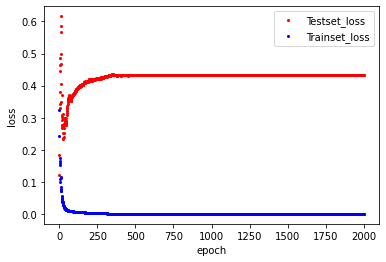

In [52]:
#4 그래프 표현

# y_vloss에 validation의 accuracy를 저장합니다.
y_vloss=history.history['val_loss']

# y_loss에 training할 때 accuracy를 저장합니다.
y_loss=history.history['loss']

# x 값을 지정하고 검증셋의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [35]:
#5

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=20)

# 모델의 이름을 정합니다.
modelpath="./data/model/Ch15-house.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_accuracy', verbose=0, save_best_only=True)

In [37]:
# 6
history = model.fit(X_test, y_test, validation_split=0.25, epochs=2000, batch_size=32)

Epoch 1/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.3235 - val_loss: 0.1216
Epoch 2/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.2422 - val_loss: 0.1829
Epoch 3/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.1657 - val_loss: 0.3317
Epoch 4/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.1585 - val_loss: 0.4641
Epoch 5/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.1743 - val_loss: 0.4862
Epoch 6/2000
1/1 [==============================] - 0s 29ms/step - loss: 0.1511 - val_loss: 0.4454
Epoch 7/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.1076 - val_loss: 0.3789
Epoch 8/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.0990 - val_loss: 0.3428
Epoch 9/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.1158 - val_loss: 0.3492
Epoch 10/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1115 - val_loss: 0.4035
Epoch 11/

In [ ]:
#숙제2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/koh-hongQ/python.git
#  데이터를 불러옵니다.
df = pd.read_csv("./python/heart disease classification dataset.csv")
df = df.fillna(df.mean())

df= pd.get_dummies(df)

normalization_df = (df - df.mean())/df.std()
X = normalization_df

k=6
kfold=KFold(n_splits=k, shuffle=True)
acc_score=[]

def model_fn():
  model = Sequential()
  model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(30, activation='tanh'))
  model.add(Dense(50, activation='sigmoid'))
  model.add(Dense(1, activation='softmax' ))
  return model

for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model=model_fn()
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
  accuracy=model.evaluate(X_test, y_test)[1]
  acc_score.append(accuracy)

avg_acc_score=sum(acc_score) / k

print('정확도: ', acc_score)
print('정확도 평균: ', avg_acc_score)